# Importar libreria y datos

In [1]:
from collections import Counter

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import ast


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/dataset_oficial.csv')

df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,final_salary
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28T00:00:00.000Z,2024-09-26,3.966667,NaN,18000.0
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24T00:00:00.000Z,2010-11-21,23.227778,NaN,21000.0
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08T00:00:00.000Z,2018-09-11,21.902778,NaN,42000.0
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23T00:00:00.000Z,2022-11-08,11.580556,NaN,18000.0
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22T00:00:00.000Z,2013-06-17,15.811111,NaN,36000.0


# EDA

## General

In [3]:
# Create feature age

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='mixed', errors='coerce')

df['age'] = pd.Timestamp.now().year - df['date_of_birth'].dt.year

In [4]:
df.columns

Index(['uuid', 'company', 'title', 'position', 'province', 'city',
       'date_of_birth', 'last_register', 'years_experience', 'skills',
       'final_salary', 'age'],
      dtype='object')

In [5]:
# Cambiamos fechas a formato datetime.

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='mixed', errors='coerce')
df['last_register'] = pd.to_datetime(df['last_register'], format='mixed')

/var/folders/3h/mn_gblgs6jzchz5_k2hy9rdw0000gn/T/ipykernel_47263/1513375594.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['last_register'] = pd.to_datetime(df['last_register'], format='mixed')


In [6]:
df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,final_salary,age
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28 00:00:00+00:00,2024-09-26 00:00:00,3.966667,NaN,18000.0,51
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24 00:00:00+00:00,2010-11-21 00:00:00,23.227778,NaN,21000.0,51
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08 00:00:00+00:00,2018-09-11 00:00:00,21.902778,NaN,42000.0,59
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23 00:00:00+00:00,2022-11-08 00:00:00,11.580556,NaN,18000.0,57
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22 00:00:00+00:00,2013-06-17 00:00:00,15.811111,NaN,36000.0,56


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   uuid              13948 non-null  object             
 1   company           13731 non-null  object             
 2   title             13937 non-null  object             
 3   position          13948 non-null  object             
 4   province          13948 non-null  object             
 5   city              13138 non-null  object             
 6   date_of_birth     13948 non-null  datetime64[ns, UTC]
 7   last_register     13948 non-null  object             
 8   years_experience  13948 non-null  float64            
 9   skills            5344 non-null   object             
 10  final_salary      6376 non-null   float64            
 11  age               13948 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(1), object(8)
m

In [8]:
print(df.isna().sum())

print((df.isna().mean() * 100).round())

uuid                   0
company              217
title                 11
position               0
province               0
city                 810
date_of_birth          0
last_register          0
years_experience       0
skills              8604
final_salary        7572
age                    0
dtype: int64
uuid                 0.0
company              2.0
title                0.0
position             0.0
province             0.0
city                 6.0
date_of_birth        0.0
last_register        0.0
years_experience     0.0
skills              62.0
final_salary        54.0
age                  0.0
dtype: float64


In [9]:
# Derivamos edad.

df['age'] = pd.Timestamp.now().year - df['date_of_birth'].dt.year

In [10]:
print(df[df["skills"].isna()].head())

                                   uuid                  company  \
0  798639f1-3c92-4cef-8727-a97e200eb82b                STUDIO 21   
1  9f71f46a-b5b5-41af-ab8b-08af20ddff42                SOL MELIA   
2  68cee060-35ee-4e64-b66f-0ac56c6b6bca    Grupo Ferrovial, S.A.   
3  067df379-8731-49c3-8c2c-321b612c0171          Heineken España   
4  c76ce749-9057-456a-acee-b22f0cde50a8  AseNet Ingenieros, S.L.   

                                               title  \
0  PROFESOR DE INFORMÁTICA | Customer Service Rep...   
1  Analista de Sistemas | CONSULTOR SENIOR SAP  |...   
2  Gerente de Sistemas de Informacion. Dpto. Inte...   
3      Responsable Helpdesk | Servicedesk Manager IT   
4  Analista | Analista-Programador | Administrado...   

                          position        province     city  \
0               Técnico de Soporte          Madrid   MADRID   
1                    Consultor ERP  Islas Baleares    Palma   
2                 Jefe de Proyecto          Madrid   Madrid   
3 

## Univariate Analysis

### Numerical features

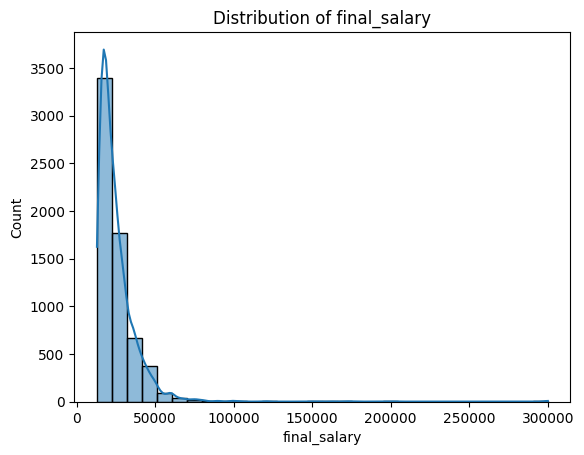

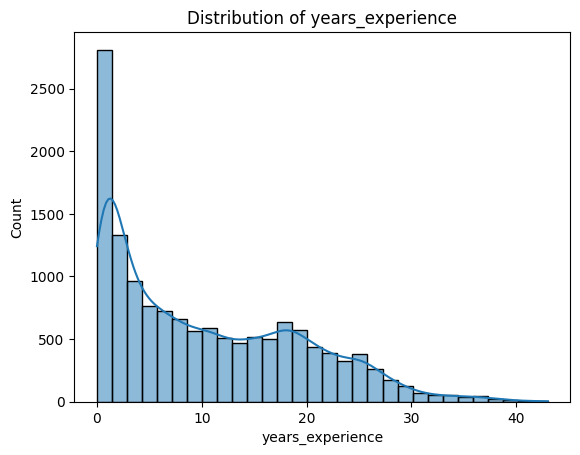

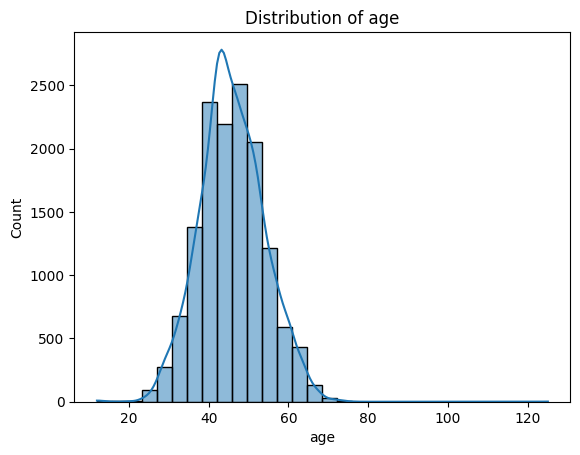


Descriptive statistics:

                    count          mean           std      min           25%  \
final_salary       6376.0  25156.524467  13492.991869  13000.0  18000.000000   
years_experience  13948.0     10.317576      9.015014      0.0      2.033333   
age               13948.0     45.888514      8.121689     12.0     41.000000   

                           50%      75%            max  
final_salary      21000.000000  30000.0  300000.000000  
years_experience      7.947222     17.4      43.016667  
age                  45.000000     51.0     125.000000  


In [11]:
# Continuous variables univariate analysis

col_num = ['final_salary', 'years_experience', 'age']

for col in col_num:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Summary stats
print("\nDescriptive statistics:\n")
print(df[col_num].describe().T)

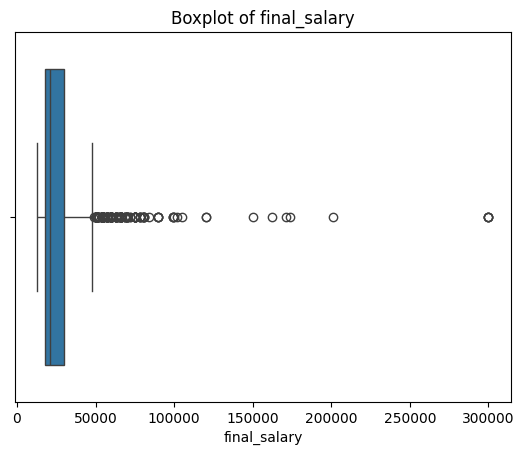

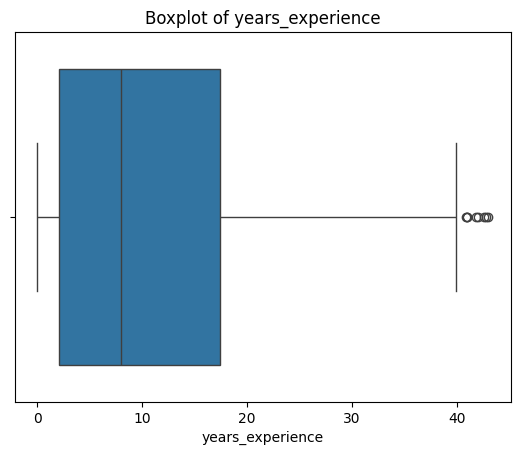

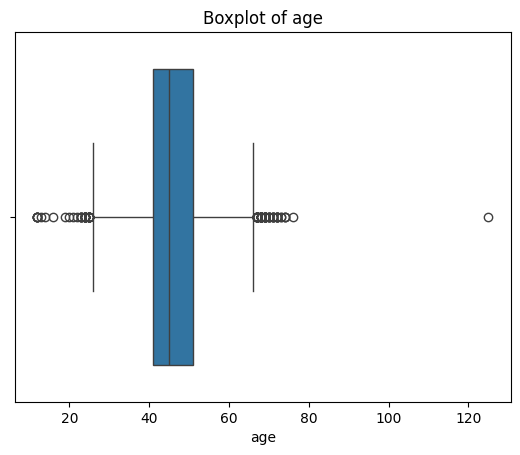

In [12]:
for col in col_num:
    plt.figure()
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


In [13]:
# Skewness value

for i in col_num:
    print(f'{i}: {skew(df[i].dropna())}')

final_salary: 7.416553467588333
years_experience: 0.7102157275431691
age: 0.17139083201249714


In [14]:
# Kurtosis value

for i in col_num:
    print(f'{i}: {kurtosis(df[i].dropna())}')

final_salary: 121.13066035999731
years_experience: -0.4448364715543316
age: 0.6355405335033475


**Findings:**
* Clearly salary is extremely unbalanced. With a skew value of 7.41, while other two variables under 0.5. The closer to 0, the more balanced.
  * Additionally, salary has a kurtosis of 121!
* Years of experience is also slightly skewed, with more people with less experience.

### Categorical features

In [15]:
# Categorical variables to explore
col_cat = ['position', 'province', 'city']
total_rows = len(df)

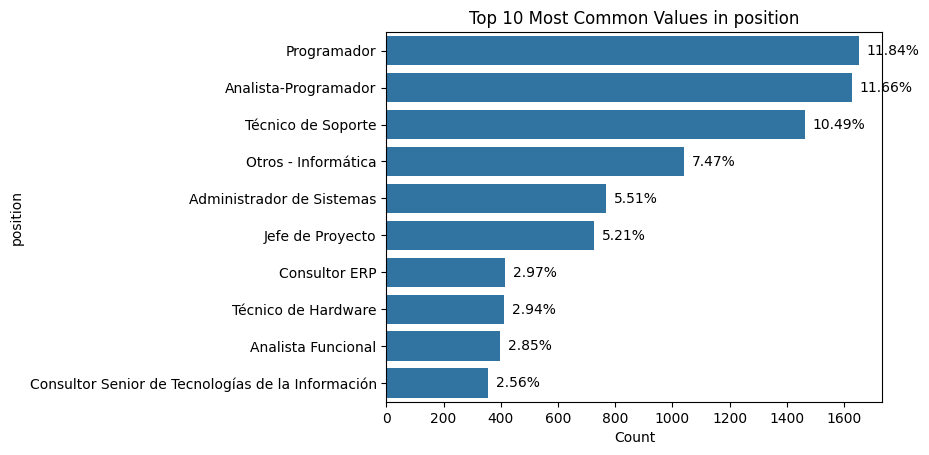


🔡 Top 5 position values:
                                                    Count  Percentage
position                                                            
Programador                                         1652       11.84
Analista-Programador                                1627       11.66
Técnico de Soporte                                  1463       10.49
Otros - Informática                                 1042        7.47
Administrador de Sistemas                            769        5.51
Jefe de Proyecto                                     726        5.21
Consultor ERP                                        414        2.97
Técnico de Hardware                                  410        2.94
Analista Funcional                                   398        2.85
Consultor Senior de Tecnologías de la Información    357        2.56


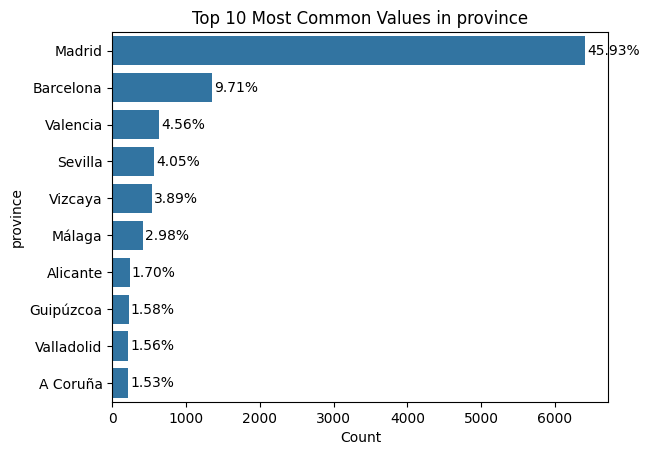


🔡 Top 5 province values:
             Count  Percentage
province                     
Madrid       6407       45.93
Barcelona    1355        9.71
Valencia      636        4.56
Sevilla       565        4.05
Vizcaya       542        3.89
Málaga        416        2.98
Alicante      237        1.70
Guipúzcoa     220        1.58
Valladolid    218        1.56
A Coruña      214        1.53


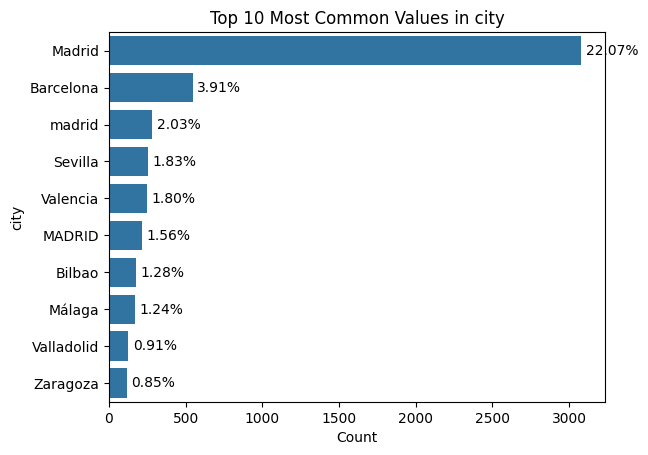


🔡 Top 5 city values:
             Count  Percentage
city                         
Madrid       3079       22.07
Barcelona     546        3.91
madrid        283        2.03
Sevilla       255        1.83
Valencia      251        1.80
MADRID        218        1.56
Bilbao        179        1.28
Málaga        173        1.24
Valladolid    127        0.91
Zaragoza      119        0.85


In [16]:

for col in col_cat:
    plt.figure()
    top = df[col].value_counts().head(10)
    percent = (top / total_rows * 100).round(2)

    ax = sns.barplot(x=top.values, y=top.index)
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

    # Add percentage labels
    for i, (count, pct) in enumerate(zip(top.values, percent)):
        ax.text(count + total_rows * 0.002, i, f"{pct:.2f}%", va='center')

    plt.show()

    print(f"\n🔡 Top 5 {col} values:\n", pd.concat([top, percent], axis=1, keys=['Count', 'Percentage']))


In [17]:
for col in col_cat:
    print(f"{col_cat} → {df[col_cat].nunique()} unique values")

['position', 'province', 'city'] → position     148
province      51
city        2510
dtype: int64 unique values
['position', 'province', 'city'] → position     148
province      51
city        2510
dtype: int64 unique values
['position', 'province', 'city'] → position     148
province      51
city        2510
dtype: int64 unique values


In [18]:
# Count company occurrences
company_counts = df['company'].value_counts()

# Count how many appear only once
single_appearance = (company_counts == 1).sum()

# Total unique companies
total_unique = company_counts.shape[0]

# Percentage
percentage_single = (single_appearance / total_unique) * 100
print(f"{percentage_single:.2f}% of companies appear only once.")


95.90% of companies appear only once.


In [19]:
company_counts = df['company'].value_counts()

more_than_once = (company_counts > 1).sum()
print(f"{more_than_once} companies appear more than once out of {df['company'].nunique()} total unique companies.")


496 companies appear more than once out of 12103 total unique companies.


In [20]:
df.columns

Index(['uuid', 'company', 'title', 'position', 'province', 'city',
       'date_of_birth', 'last_register', 'years_experience', 'skills',
       'final_salary', 'age'],
      dtype='object')

In [21]:
# How many unique values in this categorical features?

col_cat.extend(['skills', 'company'])

for i in col_cat:
    print(f'{i}: Number of unique values in {i} is {df[i].nunique()}')

position: Number of unique values in position is 148
province: Number of unique values in province is 51
city: Number of unique values in city is 2510
skills: Number of unique values in skills is 5052
company: Number of unique values in company is 12103


In [22]:
# Position formatting

df['position'].sample(20)

5525                                    Técnico de Soporte
2022                                      Formador Técnico
9566                                  Analista-Programador
5191                                           Programador
151                                       Jefe de Sistemas
7664                                  Analista-Programador
9474                                  Analista-Programador
12856                                        Diseñador Web
10195                                   Técnico de Soporte
8843                                   Otros - Informática
11519                                        Diseñador Web
129                                   Analista-Programador
8721                                Responsable de Calidad
12566    Consultor Senior de Tecnologías de la Información
13781                                   Técnico de Soporte
12383                       Técnico de Calidad y/o Pruebas
225                                     Analista Funcion

In [23]:
for col in col_cat:
    if df[col].nunique() <= 10:
        df[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f"Distribution of {col}")
        plt.ylabel("")
        plt.show()

**Findings:**

* Mayority of samples come from Madrid. 
* Mainly tech jobs. 
* City has formatting issues, while province is perfect. 
* Position is most probably a dropdown select, it is all well spelled.


Now let's take a look at two important and complex features, which are multilabel categorical -> skills and company.
These two features have the most unique variables

### Skills

In [24]:
# Let's take a look at skills... which has valuable information, but probably extremely badly formatted.

print(f'Null values in skills: {df["skills"].isna().sum()} null values which are {(df["skills"].isna().sum() / len(df)*100).round()}%')
print("-" * 60)  # separator
print(df['skills'].sample(30))

Null values in skills: 8604 null values which are 62.0%
------------------------------------------------------------
7363                                                   NaN
11718    ["Oracle Business Intelligence","Delphi","Red ...
10688                                                  NaN
267                                                    NaN
5217                                                   NaN
10766    ["JavaScript","C","Adobe Flash","Linux","Adobe...
1215                                                   NaN
4911                                                   NaN
1056                                                   NaN
9420                                                   NaN
5593     ["Python","Information Technology","MySQL","Ma...
4517                           ["C","ABAP","Pascal","SAP"]
11793    ["Visual Basic","Microsoft SQL Server","Micros...
3603     ["Engineering","Altium Designer","Management",...
10070                                 ["Data","Marketing"

In [25]:
# They seem to be well spelled... Is this a dropdown?

print(df['skills'][df['skills'].notna()].sample(50))

5731     ["Laravel","C","CSS","Management","Django","PHP"]
5408     ["C","R","Linux","Hardware","Twitter","Facebook"]
3786         ["C","Java","Disaster Recovery","Consulting"]
11975    ["JSON","SQLite","HTML","ISO 9001","TypeScript...
4631     ["PHP","ABAP","Adobe Flash","Java","Android","...
8753     ["Python","Java","HTML","Management","SQL","Sa...
1859     ["C","Unity","Symantec","Remedy","Lotus Notes"...
2693     ["Logistics","Lean Manufacturing","Consulting"...
6138                                  ["Unity","Logo","C"]
13908    ["SQL","Negotiation","Service Management","Lea...
5774     ["MySQL","Linux","PHP","JavaScript","XML","Lif...
12259    ["Applications","C","Matlab","Consulting","Jav...
11775    ["OpenOffice","Computer Science","Engineering"...
12005                         ["Lean","Scrum","SQL","SAP"]
13294    ["Ubuntu","OpenStack","Joomla","XHTML","AWS","...
5031     ["Adobe Illustrator","R","Google Analytics","M...
5390     ["SQL","MongoDB","C","HTML","PHP","XML","Virtu.

In [26]:
# How can I prove if they are well spelled or not?
# Simple, the Top 10 skills in count when making it all lower case should be the same. Let's try this.

# Drop NaN and explode the lists into one flat list of skills
# Step 1: Convert string -> list safely
skills_series = df['skills'].dropna().apply(ast.literal_eval)

flat_skills = skills_series.explode().str.strip()

skill_counts = Counter(flat_skills)

top_10_skills = skill_counts.most_common(20)

top_10_skills

[('C', 3711),
 ('SQL', 2150),
 ('Linux', 1669),
 ('Java', 1641),
 ('HTML', 1566),
 ('PHP', 1402),
 ('MySQL', 1219),
 ('CSS', 1166),
 ('R', 1113),
 ('JavaScript', 974),
 ('Microsoft Office', 927),
 ('Management', 910),
 ('SAP', 910),
 ('Marketing', 893),
 ('Android', 824),
 ('Data', 819),
 ('Visual Basic', 759),
 ('XML', 717),
 ('Windows Server', 579),
 ('Python', 578)]

In [27]:
# Now let's try while lowercasing.

skills_series = df['skills'].dropna().apply(ast.literal_eval)

flat_skills = skills_series.explode().str.strip().str.lower()

skill_counts = Counter(flat_skills)

top_10_skills = skill_counts.most_common(20)

top_10_skills

[('c', 3711),
 ('sql', 2150),
 ('linux', 1669),
 ('java', 1641),
 ('html', 1566),
 ('php', 1402),
 ('mysql', 1219),
 ('css', 1166),
 ('r', 1113),
 ('javascript', 974),
 ('microsoft office', 927),
 ('management', 910),
 ('sap', 910),
 ('marketing', 893),
 ('android', 824),
 ('data', 819),
 ('visual basic', 759),
 ('xml', 717),
 ('windows server', 579),
 ('python', 578)]

In [28]:
# It seems to be well spelled. Let's try something else:

unique_raw   = set(df['skills'].dropna().explode())          # original tokens
unique_lower = set(s.lower().strip() for s in unique_raw)    # normalised tokens

if len(unique_raw) == len(unique_lower):
    print("✔️ No case-only duplicates in *any* skill.")
else:
    print("⚠️ There are", len(unique_raw) - len(unique_lower), "case variants.")


✔️ No case-only duplicates in *any* skill.


In [29]:
from rapidfuzz import process, fuzz

cleaner = df['skills'].dropna().explode().str.lower().str.replace(r'[^a-z0-9+.# ]', '', regex=True).str.strip()


rare = [s for s, c in Counter(cleaner).items() if c < 10]
for w in rare:
    match, score, _ = process.extractOne(w, cleaner.value_counts().index, scorer=fuzz.WRatio)
    if score > 90:
        print(f"Possible variant → {w} ↔ {match} ({score}%)")


Possible variant → sqlpeoplesoftxml databasessymantecsiebelhtmlunixhardwareremedyxmlsocial mediadatabasesnetworking ↔ sqlpeoplesoftxml databasessymantecsiebelhtmlunixhardwareremedyxmlsocial mediadatabasesnetworking (100.0%)
Possible variant → business developmenttestingconsulting ↔ business developmenttestingconsulting (100.0%)
Possible variant → microsoft officec ↔ microsoft officec (100.0%)
Possible variant → citrixadvertisingdigital marketingbloggermarketingmicrosoft officec ↔ citrixadvertisingdigital marketingbloggermarketingmicrosoft officec (100.0%)
Possible variant → sqldata warehouseswingumlphpperlandroidhtmljavascriptjavamysqlcdatalinuxxmlhibernateunixconsultingjbuilder ↔ sqldata warehouseswingumlphpperlandroidhtmljavascriptjavamysqlcdatalinuxxmlhibernateunixconsultingjbuilder (100.0%)
Possible variant → androidcobollinuxcvisual basic ↔ androidcobollinuxcvisual basic (100.0%)
Possible variant → marketingaspapplicationstrainingbootstrapcssjqueryconsultinghtmldrupalweb designwor

In [30]:
import ast, re
from collections import Counter

def safe_eval(text):
    """Return a list if text looks like one, else wrap plain string in a list."""
    try:
        value = ast.literal_eval(text)
        return value if isinstance(value, list) else [text]
    except (ValueError, SyntaxError):
        return [text]           # plain string

def split_item(item):
    """Split on common separators inside each list element."""
    # commas, semicolons, slashes, plus signs, ' and ', extra spaces
    return re.split(r'[,+/;&]|(?:\s+and\s+)', item)

# 1. Parse every row safely
parsed = (
    df["skills"]
      .dropna()
      .apply(safe_eval)         # -> list for every row
      .explode()                # flatten column
      .str.strip()
      .str.lower()
)

# 2. Split inner items that still contain multiple skills
clean_tokens = (
    parsed
      .apply(split_item)        # returns list per element
      .explode()                # flatten again
      .str.strip()
)
clean_tokens = clean_tokens[clean_tokens != ""]   # drop empties

# 3. Count
skill_counts = Counter(clean_tokens)
top_10 = skill_counts.most_common(10)

print("Top 10 clean skills:")
for s, c in top_10:
    print(f"{s}: {c}")


Top 10 clean skills:
c: 3711
sql: 2150
linux: 1669
java: 1641
html: 1566
php: 1402
mysql: 1219
css: 1166
r: 1113
javascript: 974


In [31]:
from rapidfuzz import process, fuzz

# tokens that appear less than, say, 5 times
rare = [s for s, cnt in skill_counts.items() if cnt < 5]

# compare each rare token against the full set of common ones
for word in rare:
    match, score, _ = process.extractOne(
        word, skill_counts.keys(), scorer=fuzz.WRatio
    )
    if score > 85 and match != word:
        print(f"🤔  '{word}' might be a typo for '{match}' ({score} %)")

**Findings:**

* Skills is indeed a dropdown... Nobody wrote their skills! They are all unique...
* Does this imply that TF-IDF, or a simple Bag-of-Words would've worked perfectly?

### Company

In [32]:
print(f"Unique companies: {df['company'].nunique()}")
print(df['company'].value_counts().head(10))  # Most common
print(df['company'].value_counts().tail(10))  # Rare companies

Unique companies: 12103
company
Accenture    120
Indra         56
Freelance     54
Everis        48
IBM           39
Capgemini     34
Autónomo      30
everis        30
INDRA         30
Coritel       27
Name: count, dtype: int64
company
DxD Deloitte                                                                        1
SERVICIOS INFORMATICOS DE ALAVA, S.A.                                               1
INDRA- CLIENTE RED ELECTRICA DE ESPAÑA                                              1
PROMARSA Marketing & Asociados                                                      1
Ywen S.L.L. (Toledo)                                                                1
GRUPO SOLUTIO- Destinada durante 7 años en la Agencia Tributaria (DIT) de Madrid    1
GAES                                                                                1
Embention                                                                           1
ALBORGIS                                                                    

In [33]:
# Let's input the companies with missing values.

df["company"] = df["company"].fillna("Other") # 200 something.

print("Company nulls after fill:", df["company"].isna().sum())  # Chequear... cuantos NAs tenemos?

Company nulls after fill: 0


In [34]:
# Let's do some manual cleaning

import re
import unicodedata

def strip_accents(text: str) -> str:
    """Remove diacritics, e.g. ‘España’ → ‘Espana’."""
    return "".join(
        ch
        for ch in unicodedata.normalize("NFKD", text)
        if not unicodedata.combining(ch)
    )

def clean_company(name: str) -> str:
    """
    1) Lowercase and strip whitespace
    2) Replace ‘&’ → ‘ and ’
    3) Remove punctuation (commas, periods, parentheses)
    4) Remove common corporate suffixes (‘s.a.’, ‘sa’, ‘s.l.’, etc.) at end
    5) Strip accents
    6) Collapse multiple spaces
    """
    if pd.isna(name) or not name.strip():
        return "others"  # or whatever placeholder you chose

    s = name.lower().strip()
    s = re.sub(r"&", " and ", s)
    s = re.sub(r"[\,\.\(\)]", " ", s)
    # Remove Spanish “S.A.” / “SA” / “S.L.” suffixes at the end:
    s = re.sub(r"\s+(s\.?a\.?|s\.?l\.?)$", "", s)
    s = strip_accents(s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# Apply:
df["company_clean"] = df["company"].fillna("others").apply(clean_company)

df["company_clean"]

0                                                studio 21
1                                                sol melia
2                                      grupo ferrovial s a
3                                          heineken espana
4                                    asenet ingenieros s l
                               ...                        
13943    freelance | fhios smart knowledge | w3 it solu...
13944    cinfo contenidos informativos s l | invbit dis...
13945    mostrarium - beecubu | kinnik sport and juno |...
13946                                  sdg group | bosonit
13947                                          cimadigital
Name: company_clean, Length: 13948, dtype: object

**Findings:**
* This feature has easily the most amount of typos.
* There is not way we will extract any value from them alone.
* Perhaps we could run an LLM to output industry?
* Could a transformer work?

## Multivariate Analysis

### Years of experience / age vs Salary

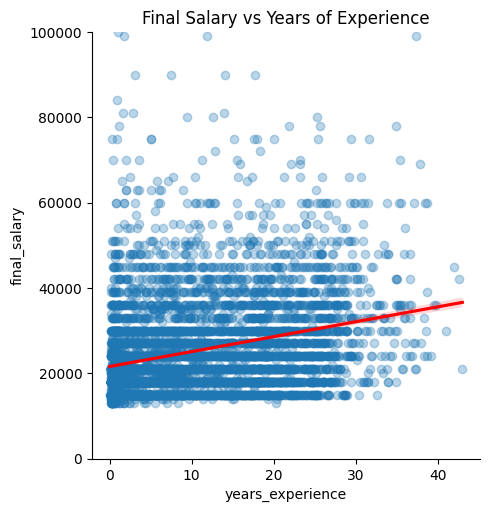

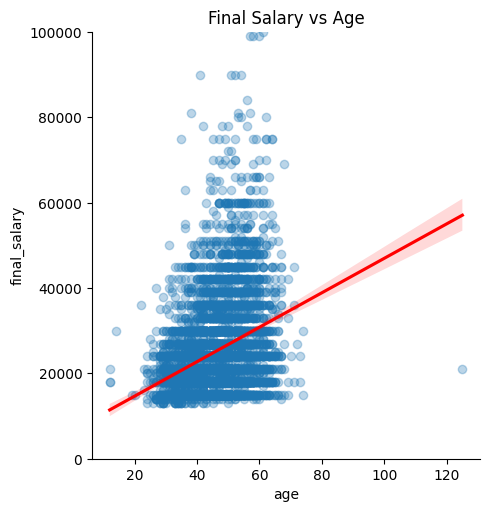

In [35]:
# Scatter: Final Salary vs Years of Experience
sns.lmplot(x='years_experience', y='final_salary', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.ylim(0, 100000)  # adjust as needed
plt.title("Final Salary vs Years of Experience")
plt.show()

# Scatter: Final Salary vs Age
sns.lmplot(x='age', y='final_salary', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.ylim(0, 100000)  # adjust as needed
plt.title("Final Salary vs Age")
plt.show()


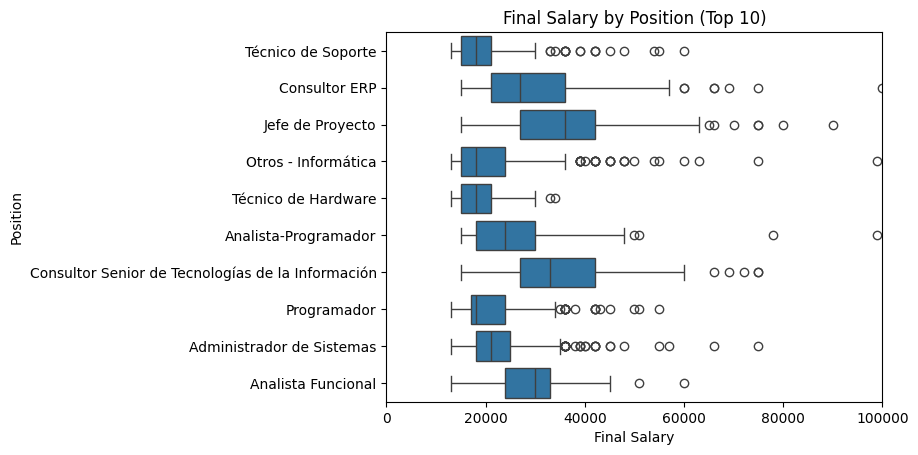

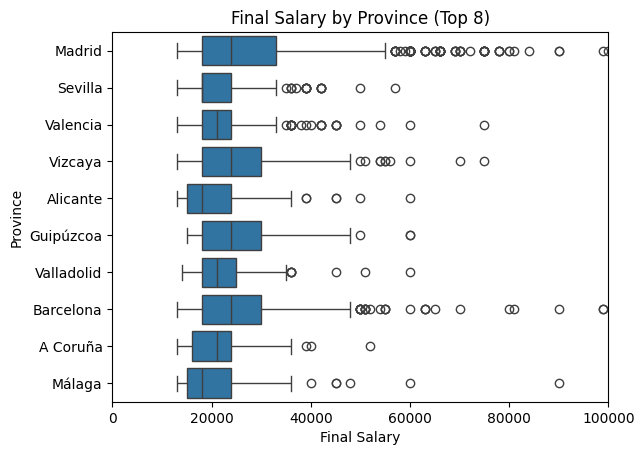

In [36]:
# Final salary by position (Top 10)
top_positions = df['position'].value_counts().head(10).index
plt.figure()
sns.boxplot(data=df[df['position'].isin(top_positions)], x='final_salary', y='position')
plt.xlim(0, 100000)
plt.title("Final Salary by Position (Top 10)")
plt.xlabel("Final Salary")
plt.ylabel("Position")
plt.show()

# Final salary by province (Top 10)
top_provinces = df['province'].value_counts().head(10).index
plt.figure()
sns.boxplot(data=df[df['province'].isin(top_provinces)], x='final_salary', y='province')
plt.xlim(0, 100000)
plt.title("Final Salary by Province (Top 8)")
plt.xlabel("Final Salary")
plt.ylabel("Province")
plt.show()


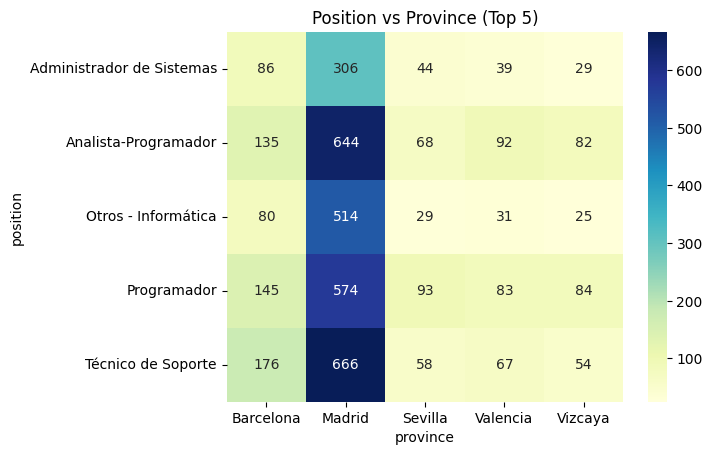

In [37]:
# Position vs Province: top 5 of each
cross_tab = pd.crosstab(
    df[df['position'].isin(df['position'].value_counts().head(5).index)]['position'],
    df[df['province'].isin(df['province'].value_counts().head(5).index)]['province']
)

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Position vs Province (Top 5)")
plt.show()


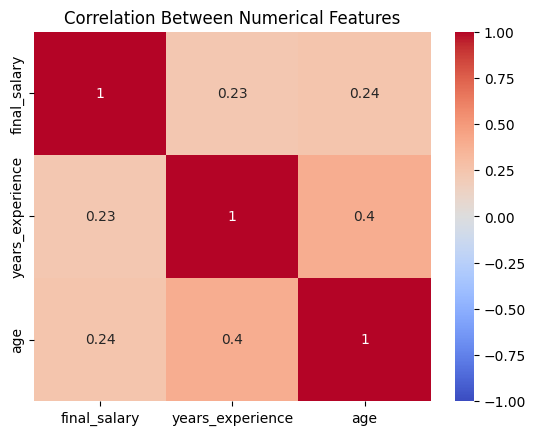

In [38]:
# Correlation heatmap
plt.figure()
numerical_features = ['final_salary', 'years_experience', 'age']
corr = df[numerical_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Numerical Features")
plt.show()

### Skills vs Salary

In [39]:
# Are more skills correlated to more salary? Or the other way around? Or neither?!

df['log_salary'] = np.log1p(df['final_salary']) # I will first log salary to avoid skewness.

   n_skills  final_salary
0         0       18000.0
1         0       21000.0
2         0       42000.0
3         0       18000.0
4         0       36000.0
Mean salary by #skills


,count,mean,median
n_skills,,,
0,3974,24905.888274,21000.0
1,98,22214.285714,18000.0
2,143,23853.146853,18000.0
3,150,25786.666667,20000.0
4,153,25209.150327,20000.0
5,135,21837.037037,20000.0
6,165,26703.030303,21000.0
7,141,22851.063830,21000.0
8,143,24839.160839,21000.0


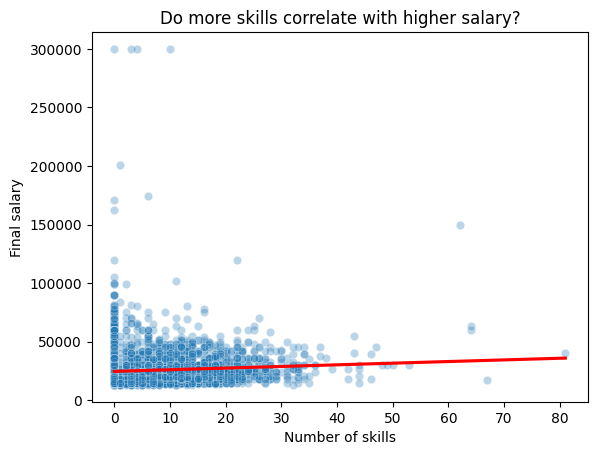

Pearson r = 0.030  (p=0.000351)
Spearman ρ = 0.002  (p=0.782)


In [40]:
# Now I will check tabular(ly), visually, and mathematically.
# Mathematically being the Pearson coefficient.

import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns   # optional but makes plots nicer

# --- 1. Parse the skills column ------------------------------------------------
# If you already converted the column to real lists, skip this block.
df['skills_list'] = (
    df['skills']
      .fillna("[]")                              # keep NaNs from breaking eval
      .apply(ast.literal_eval)                   # string → list
      .apply(lambda x: x if isinstance(x, list) else [])   # safety
)

# --- 2. Count skills per row ----------------------------------------------------
df['n_skills'] = df['skills_list'].apply(len)

print(df[['n_skills', 'final_salary']].head())

# --- 3. Quick descriptive stats -------------------------------------------------
print("Mean salary by #skills")
display(
    df.groupby('n_skills')['final_salary']
      .agg(['count','mean','median'])
      .sort_index()
      .head(30)                                  # show first few rows
)

# --- 4. Scatter / trend plot ----------------------------------------------------
sns.scatterplot(x='n_skills', y='final_salary', data=df, alpha=0.3)
sns.regplot(x='n_skills', y='final_salary', data=df,
            scatter=False, ci=None, color='red')  # add trend line
plt.xlabel("Number of skills")
plt.ylabel("Final salary")
plt.title("Do more skills correlate with higher salary?")
plt.show()

# --- 5. Correlations ------------------------------------------------------------
pearson = pearsonr(df['n_skills'], df['final_salary'].fillna(0))
spearman = spearmanr(df['n_skills'], df['final_salary'].fillna(0))
print(f"Pearson r = {pearson[0]:.3f}  (p={pearson[1]:.3g})")
print(f"Spearman ρ = {spearman.correlation:.3f}  (p={spearman.pvalue:.3g})")


/Users/adri/.pyenv/versions/3.10.6/envs/datafest2025/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


977 unique skills after cleaning


Batches: 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Silhouette scores: {5: np.float32(0.027290387), 10: np.float32(0.030215679), 15: np.float32(0.029117566), 20: np.float32(0.032496274), 25: np.float32(0.037972543)}
→ using k=25

Top skills per cluster:


cluster
0     aes, antivirus, aruba networks, aws security, ...
1     4nec2, aiops, ansys, anydesk, as2, as3, asp, a...
2     access vba, actionscript, active directory, ac...
3     account management, api management, budget man...
4     apex data loader, azure data factory, big data...
5     activecampaign, acunetix, ada, ahrefs, alfresc...
6     application design, application development, a...
7     abap, abap cds, abap dictionary, abap objects,...
8     3d animation, 3d modeling, 3d printers, 3d pri...
9     ibm aix, oracle application server, oracle bus...
10    2g, 3gpp, 5g, access points, arduino, cisco ro...
11    android, android development, android sdk, and...
12    apache ant, apache camel, apache cordova, apac...
13    advertising, communication skills, consulting,...
14    sap, sap ariba, sap basis, sap business one, s...
15    antimalware, aspectj, atlassian confluence, at...
16    aerospike, alamofire, asana, bower, caffe, cam...
17    ajax, angular, api restful, arcgis


Average salary per cluster:


,count,mean,median
skill_cluster,,,
3,189,40777.78,36000.0
6,76,40516.13,42000.0
9,10,35800.00,40000.0
13,312,29658.73,26500.0
4,219,29030.61,26500.0
14,144,28967.74,26000.0
24,76,28093.75,24500.0
16,97,27224.49,25000.0
7,104,27080.00,24000.0


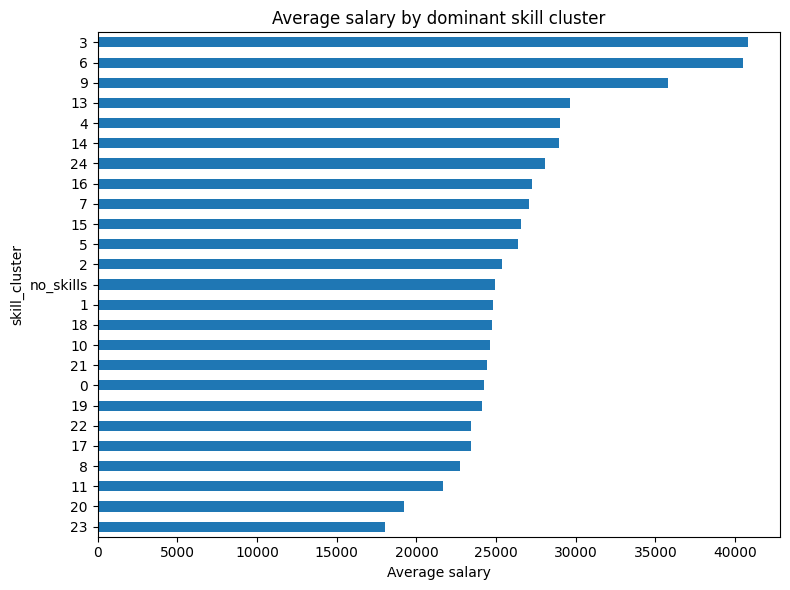

In [ ]:
# --------------------------------------------------------------------------------
# 0.  SETUP  ──────────────────────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
!pip install -q sentence-transformers scikit-learn

import ast
import numpy as np
import pandas as pd
from collections import Counter
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans          # straightforward, change to HDBSCAN if you like
from sklearn.metrics import silhouette_score

# --------------------------------------------------------------------------------
# 1.  PARSE & CLEAN SKILLS  ───────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
def to_list(val):
    # safely eval "['Python','SQL']" → ['python','sql']; NaN → []
    if pd.isna(val):
        return []
    try:
        out = ast.literal_eval(val)
        if not isinstance(out, list):
            out = [str(out)]
        return [s.strip().lower() for s in out if s.strip()]
    except Exception:
        return []

df['skills_list'] = df['skills'].apply(to_list)

# quick sanity: how many unique skills?
all_skills = pd.Series(np.concatenate(df['skills_list'].values))
unique_skills = sorted(all_skills.unique())
print(f"{len(unique_skills):,} unique skills after cleaning")

# --------------------------------------------------------------------------------
# 2.  EMBED UNIQUE SKILLS  ────────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
model_name = "sentence-transformers/all-MiniLM-L6-v2"   # fast, English
embedder   = SentenceTransformer(model_name)

skill_vecs = embedder.encode(unique_skills, batch_size=128, show_progress_bar=True)

# --------------------------------------------------------------------------------
# 3.  CHOOSE  k  (optional helper)  ───────────────────────────────────────────────
# --------------------------------------------------------------------------------
# Rough elbow method: silhouette for k in 5..25
scores = {}
for k in range(5, 26, 5):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(skill_vecs)
    scores[k] = silhouette_score(skill_vecs, labels)
print("Silhouette scores:", scores)

k = max(scores, key=scores.get)     # pick best k
print(f"→ using k={k}")

# --------------------------------------------------------------------------------
# 4.  CLUSTER  ────────────────────────────────────────────────────────────────────
# --------------------------------------------------------------------------------
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(skill_vecs)

skill_to_cluster = dict(zip(unique_skills, cluster_labels))

# helper: inspect each cluster's top tokens
cluster_summary = (
    pd.DataFrame({"skill": unique_skills, "cluster": cluster_labels})
    .groupby("cluster")["skill"]
    .apply(lambda s: ", ".join(s.head(10)))
)
print("\nTop skills per cluster:")
display(cluster_summary)

# --------------------------------------------------------------------------------
# 5.  ASSIGN CANDIDATE TO A “DOMINANT CLUSTER”  ──────────────────────────────────
# --------------------------------------------------------------------------------
def dominant_cluster(skill_list):
    if not skill_list:
        return -1                     # no skills
    clusters = [skill_to_cluster[s]   for s in skill_list]
    # mode cluster for that person
    return Counter(clusters).most_common(1)[0][0]



df['skill_cluster'] = df['skills_list'].apply(dominant_cluster)

# --------------------------------------------------------------------------------
# 6.  AGGREGATE SALARY BY CLUSTER  ────────────────────────────────────────────────
# --------------------------------------------------------------------------------
summary = (
    df.groupby('skill_cluster')['final_salary']
      .agg(count='size', mean='mean', median='median')
      .sort_values('mean', ascending=False)
)

# Relabel cluster -1 for clarity
summary.index = summary.index.where(summary.index != -1, "no_skills")

print("\nAverage salary per cluster:")
display(summary.round(2))

# optional: bar plot
import matplotlib.pyplot as plt
summary['mean'].plot(kind='barh', figsize=(8,6))
plt.xlabel("Average salary")
plt.title("Average salary by dominant skill cluster")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [42]:
print(cluster_summary.loc[[3]].to_string())


cluster
3    account management, api management, budget man...


In [43]:
# A quick table of “representative” skills for every cluster
top_per_cluster = (
    pd.DataFrame({"skill": unique_skills, "cluster": cluster_labels})
      .groupby("cluster")["skill"]
      .apply(lambda s: ", ".join(s[:15]))        # first 15 skills
)

pd.set_option("display.max_colwidth",  None)   # unlimited column width
pd.set_option("display.width",         2000)   # how many characters a row can show
pd.set_option("display.max_rows",      100)    # if you want to show more clusters too

# now re-display the table
display(top_per_cluster)


cluster
0                                                                                                  aes, antivirus, aruba networks, aws security, azure security, bitcoin, bitlocker, blockchain, cisco meraki, cisco networking, cisco networking academy, cisco technologies, cobit, computer forensics, computer networks
1                                                                                                                                                                                                                   4nec2, aiops, ansys, anydesk, as2, as3, asp, asterisk, c, cissp, civicrm, cocos2d, etl, imap, iso 14001
2                                                                              access vba, actionscript, active directory, activex, altium designer, arcgis, arcgis enterprise, arcgis online, arcgis pro, arcobjects, businessobjects, dynamics 365 business central, entity framework, entity framework core, libreoffice
3                                           

In [49]:
# ─────────────────────────────────────────────────────────────────────────────
# BAG-OF-CLUSTERS (dummy columns) WITH A CUSTOM THRESHOLD
# ─────────────────────────────────────────────────────────────────────────────
#
# prerequisites already in memory:
#   • df                – your main DataFrame
#   • df['skills_list'] – list of cleaned, lower-case skill tokens per row
#   • skill_to_cluster  – dict {skill → cluster_id}
#   • n_clusters        – number of skill clusters (k-means or HDBSCAN result)

# 1 ▸ choose how strict you want the flag
THRESHOLD = 3          # set to 1, 2, 3 … as you wish
                       # THRESHOLD = 1 reproduces the "≥1 skill" logic
print(f"Creating flags: 1 if a candidate has ≥ {THRESHOLD} skill(s) from a cluster")

# 2 ▸ build a fresh dummy frame ----------------------------------------------
from collections import Counter
import pandas as pd
import numpy as np

def make_flag_row(skill_list):
    """Return 0/1 flags for every cluster (plus -1 for no skills)."""
    counts = Counter(skill_to_cluster[s] for s in skill_list)
    row = {f"cluster_{k}": int(counts.get(k, 0) >= THRESHOLD)
           for k in range(n_clusters)}
    row["cluster_-1"] = int(len(skill_list) == 0)   # no skills flag
    return row

cluster_dummies = df["skills_list"].apply(make_flag_row).apply(pd.Series)

# 3 ▸ replace old cluster_* columns (if any) and join -------------------------
df = df.drop(columns=df.filter(regex=r"^cluster_").columns) \
       .join(cluster_dummies)

print("Dummy matrix shape:", cluster_dummies.shape)
print("Example row:\n", cluster_dummies.head(1).T)

# 4 ▸ median salary for "has ≥ THRESHOLD skills in cluster k" -----------------
median_by_presence = (
    df.filter(regex=r"^cluster_")                       # the flag columns only
      .apply(lambda col: df.loc[col == 1, "final_salary"].median())
      .sort_values(ascending=False)
      .rename("median_salary")
)

# add profile counts for context
count_by_presence = (
    df.filter(regex=r"^cluster_")
      .apply(np.sum)                                   # how many rows have flag==1
      .rename("n_profiles")
)

summary = pd.concat([median_by_presence, count_by_presence], axis=1)
display(summary)


Creating flags: 1 if a candidate has ≥ 3 skill(s) from a cluster
Dummy matrix shape: (13948, 26)
Example row:
             0
cluster_0   0
cluster_1   0
cluster_2   0
cluster_3   0
cluster_4   0
cluster_5   0
cluster_6   0
cluster_7   0
cluster_8   0
cluster_9   0
cluster_10  0
cluster_11  0
cluster_12  0
cluster_13  0
cluster_14  0
cluster_15  0
cluster_16  0
cluster_17  0
cluster_18  0
cluster_19  0
cluster_20  0
cluster_21  0
cluster_22  0
cluster_23  0
cluster_24  0
cluster_-1  1


/Users/adri/.pyenv/versions/3.10.6/envs/datafest2025/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,median_salary,n_profiles
cluster_6,40000.0,127
cluster_3,39000.0,183
cluster_9,38000.0,10
cluster_16,30000.0,117
cluster_13,30000.0,206
cluster_24,30000.0,133
cluster_4,30000.0,239
cluster_14,28500.0,61
cluster_7,27000.0,136
cluster_8,27000.0,85


In [44]:
# list of cluster IDs present in each row
df["clusters_present"] = df["skills_list"].apply(
    lambda lst: sorted({skill_to_cluster[s] for s in lst}) if lst else [-1]
)

# explode → wide pivot → 0/1 columns
cluster_dummies = (
    df[["uuid", "clusters_present"]]
      .explode("clusters_present")
      .assign(val=1)
      .pivot_table(index="uuid",
                   columns="clusters_present",
                   values="val",
                   fill_value=0)
      .add_prefix("cluster_")        # e.g. cluster_3, cluster_-1
)

# join back to main frame
df = df.join(cluster_dummies, on="uuid")

ValueError: columns overlap but no suffix specified: Index(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15', 'cluster_16', 'cluster_17', 'cluster_18', 'cluster_19', 'cluster_20', 'cluster_21', 'cluster_22', 'cluster_23', 'cluster_24', 'cluster_-1'], dtype='object')

In [ ]:
# mean salary for anyone having at least one skill in each cluster
mean_by_presence = {
    c: df.loc[df[f"cluster_{c}"] == 1, "final_salary"].mean()
    for c in cluster_dummies.columns.str.replace("cluster_", "").astype(int)
}
pd.Series(mean_by_presence).sort_values(ascending=False)


 3     33086.767896
 6     32551.980198
 9     30291.139241
 23    30272.727273
 4     30050.000000
 24    29739.189189
 14    29603.365385
 13    29152.238806
 16    27310.549777
 21    27058.679707
 19    27053.072626
 7     26854.107649
 0     26514.150943
 5     26423.728814
 12    26320.000000
 10    25802.180685
 18    25477.254589
 8     25437.636761
 1     25299.573561
 22    25119.025305
 2     25027.855153
 15    24956.575682
-1     24905.888274
 17    24632.492114
 11    23940.944882
 20    21251.461988
dtype: float64

In [ ]:
asdfas

In [ ]:
df.columns

Index(['uuid', 'company', 'title', 'position', 'province', 'city', 'date_of_birth', 'last_register', 'years_experience', 'skills', 'final_salary', 'age', 'company_clean', 'log_salary', 'skills_list', 'n_skills', 'skill_cluster', 'clusters_present', 'cluster_-1', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15', 'cluster_16', 'cluster_17', 'cluster_18', 'cluster_19', 'cluster_20', 'cluster_21', 'cluster_22', 'cluster_23', 'cluster_24'], dtype='object')

In [ ]:
# mean salary for anyone having at least one skill in each cluster
median_by_presence = {
    c: df.loc[df[f"cluster_{c}"] == 1, "final_salary"].median()
    for c in cluster_dummies.columns.str.replace("cluster_", "").astype(int)
}
pd.Series(median_by_presence).sort_values(ascending=False)


 6     30000.0
 3     30000.0
 23    28000.0
 9     28000.0
 4     27000.0
 12    25000.0
 14    25000.0
 24    25000.0
 7     24000.0
 13    24000.0
 21    24000.0
 19    24000.0
 18    24000.0
 16    24000.0
 0     24000.0
 5     24000.0
 8     22000.0
 2     21000.0
 15    21000.0
 17    21000.0
 11    21000.0
 10    21000.0
 22    21000.0
 1     21000.0
-1     21000.0
 20    19000.0
dtype: float64

In [ ]:
median_dom = (
    df.groupby('skill_cluster')['final_salary']
      .agg(median='median', n='size')
      .sort_values('median', ascending=False)
)

display(median_dom)


,median,n
skill_cluster,,
6,42000.0,76
9,40000.0,10
3,36000.0,189
15,27000.0,59
4,26500.0,219
13,26500.0,312
14,26000.0,144
16,25000.0,97
24,24500.0,76


**Findings:**
* More skills =/= More salary.
* Clusters seem to tell us something about salary... Indeed there is a diff. But how do we apply these to every candidate?
  * We can get a dominant cluster for each.
  * Or use bag of words of clustering for each.

# Feature Engineering

## Last registry

In [ ]:
df['last_register'] = pd.to_datetime(df['last_register'], errors='coerce').dt.year

## Province & Comunidad

In [ ]:
df['skills'].isnull().sum()

np.int64(8604)

In [ ]:
# Diccionario con comunidades.

prov_to_ccaa = {
    'Álava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Asturias': 'Principado de Asturias',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Cantabria': 'Cantabria',
    'Castellón': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Córdoba': 'Andalucía',
    'Cuenca': 'Castilla-La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Islas Baleares': 'Islas Baleares',
    'Jaén': 'Andalucía',
    'La Rioja': 'La Rioja',
    'Las Palmas': 'Canarias',
    'León': 'Castilla y León',
    'Lleida': 'Cataluña',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Málaga': 'Andalucía',
    'Melilla': 'Melilla',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Ourense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón'
}

In [ ]:
df['comunidad'] = df['province'].map(prov_to_ccaa)

In [ ]:
df.groupby('comunidad')['final_salary'].mean().sort_values(ascending=False)

In [ ]:
# Agrupación y conteo
counts = df['comunidad'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', edgecolor='black')
plt.title('Número de registros por comunidad autónoma')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# por que 900!?!?!?!?!?
# Umbral mínimo para considerar comunidad significativa ...
umbral = 500

# Obtener conteo de comunidades
comunidad_counts = df['comunidad'].value_counts()

# Crear nueva columna con agrupación
df['comunidad'] = df['comunidad'].apply(
    lambda x: x if pd.notnull(x) and comunidad_counts.get(x, 0) >= umbral else 'Otros'
)

In [ ]:
df['comunidad']

In [ ]:
# Nuevo conteo
counts_agrupados = df['comunidad'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
counts_agrupados.plot(kind='bar', edgecolor='black', color='steelblue')
plt.title('Número de registros por comunidad autónoma (agrupado)')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
def limpiar_columna(col):
    if col.startswith('comunidad_'):
        nombre = col.replace('comunidad_', '')
        # Quitar tildes
        nombre = unicodedata.normalize('NFKD', nombre).encode('ascii', 'ignore').decode('utf-8')
        # Reemplazar espacios y guiones por guiones bajos, bajar todo a minúsculas
        nombre = re.sub(r'[^a-zA-Z0-9]', '_', nombre).lower()
        # Evitar múltiples guiones bajos seguidos
        nombre = re.sub('_+', '_', nombre).strip('_')
        return f"comunidad_{nombre}"
    return col

In [ ]:
df = pd.get_dummies(df, columns=['comunidad'], prefix='comunidad', drop_first=False)

# Aplicar a nombres de columnas
df.columns = [limpiar_columna(col) for col in df.columns]

In [ ]:
df.columns

## Company

In [ ]:
!python -mspacy download es_core_news_sm # descargarnos spaCy para limpiar bien.
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 37.4 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
nlp = spacy.load("es_core_news_sm") # modelo de ESP.

# Función para limpiar company.
def spacy_clean(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.lower().strip())

    # dejamos solamente valores alphanumericos.
    tokens = [token.text for token in doc if token.is_alpha or token.is_digit]

    return ' '.join(tokens)

In [ ]:
# Aplicamos funcion a columna

df['company_clean'] = df['company'].apply(spacy_clean)

In [ ]:
# Apliquemos sentence transformers -> es lo mas eficiente
!pip install sentence_transformers

from sentence_transformers import SentenceTransformer

In [ ]:
# Iniciamos modelo y vemos que tal.

model = SentenceTransformer('distiluse-base-multilingual-cased-v2') # modelo en español.

texts = df['company_clean'].astype(str).tolist() # pasamos todas las companias a una lista para crear los embeddings.

# Genera embeddings!
embeddings = model.encode(texts, show_progress_bar=True)

In [ ]:
# Join al df.

# Convert to DataFrame
emb_df = pd.DataFrame(embeddings, columns=[f'company_emb_{i}' for i in range(embeddings.shape[1])])

# Merge with original df
df = pd.concat([df.reset_index(drop=True), emb_df], axis=1)

In [ ]:
# al parecer los datos parecen muy bien formateados. Deben de ser elegidos y no escritos probablemente.

# Limpiemos pero muy muy basico.
def spacy_clean_position(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.strip().lower())  # lowercase + remove leading/trailing spaces

    # Keep only words (no punctuation, no stopwords, etc.)
    tokens = [token.text for token in doc if token.is_alpha]

    return ' '.join(tokens)

In [ ]:
df['position_clean'] = df['position'].apply(spacy_clean_position)

In [ ]:
# Encode position_clean using the same multilingual model
position_texts = df['position_clean'].astype(str).tolist()

position_embeddings = model.encode(position_texts, show_progress_bar=True)

In [ ]:
# Join

position_emb_df = pd.DataFrame(position_embeddings, columns=[f'position_emb_{i}' for i in range(position_embeddings.shape[1])])

df = pd.concat([df.reset_index(drop=True), position_emb_df], axis=1)

## Title

In [ ]:
def spacy_clean_title_with_commas(text):
    if not text or pd.isna(text):
        return ''

    # Normalize weird separators before spaCy
    text = text.replace('|', ',')
    text = text.replace('/', ',')
    text = text.replace(' - ', ',')  # only where dash is used like a list separator

    doc = nlp(text.lower().strip())

    # Lemmatize and keep alpha tokens or commas
    tokens = []
    for token in doc:
        if token.is_alpha:
            tokens.append(token.lemma_)
        elif token.text == ',':
            tokens.append(',')

    return ' '.join(tokens)

In [ ]:
df['title_clean'] = df['title'].apply(spacy_clean_title_with_commas)
df['title_clean']

In [ ]:
df['title_clean'].head(50)

In [ ]:
# Again, transformers.

title_texts = df['title_clean'].tolist()
title_embeddings = model.encode(title_texts, show_progress_bar=True)

In [ ]:
title_emb_df = pd.DataFrame(title_embeddings, columns=[f'title_emb_{i}' for i in range(title_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), title_emb_df], axis=1)

## Skills

In [ ]:
from itertools import chain

all_skills = df['skills'].dropna().apply(lambda x: [s.strip().lower() for s in str(x).split(',')])
flat_skills = list(chain.from_iterable(all_skills))
print(f"Unique skills: {len(set(flat_skills))}")
print(sorted(set(flat_skills))[:50])  # Peek at the first 50

In [ ]:
df['has_skills'] = df['skills'].notna().astype(int)
print(df.groupby('has_skills')['final_salary'].describe())

In [ ]:
# Funcion clasica para limpiar

import re

def clean_skills(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'[\[\]"]', '', text)  # remove brackets and quotes
    text = re.sub(r'\s*,\s*', ', ', text)  # ensure clean spacing around commas
    return text.strip()

In [ ]:
df['skills_clean'] = df['skills'].apply(clean_skills)

In [ ]:
skills_texts = df['skills_clean'].tolist()
skills_embeddings = model.encode(skills_texts, show_progress_bar=True)

skills_emb_df = pd.DataFrame(skills_embeddings, columns=[f'skills_emb_{i}' for i in range(skills_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), skills_emb_df], axis=1)